In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
from umibato import Umibato

In [3]:
import pandas as pd

## Reading Quantitative Microbiota Profiles (QMPs) and metadata

In [4]:
qmps = pd.read_csv('../data/x.tsv', delimiter='\t', index_col=0)
qmps.columns = qmps.columns.astype(str)

You may have to arrange your QMPs when your QMPs have many different microbes.

Here, you take some major microbes based on relative abundance.

In [5]:
normalized_qmps = qmps.apply(lambda x: x/x.sum(), axis=0)
qmps = qmps.loc[normalized_qmps.mean(1)>0.0001, :]

You also have to read metadata.

In [6]:
metadata = pd.read_csv('../data/metadata.tsv', delimiter='\t', index_col=0)
metadata.index = metadata.index.astype(str)

Metadata used in Umibato must have two columns whose names are "subjectID" and "timepoint."

The "subjectID" column indicates independent series.

The "timepoint" column indicates the time of each sample.

Any row names are acceptable, but duplication must be avoided. 

In [7]:
metadata

,subjectID,timepoint
sampleID,,
sample0,0,0.0
sample1,0,0.1
sample2,0,0.2
sample3,0,0.3
sample4,0,0.4
sample5,0,0.5
sample6,0,0.6
sample7,0,0.7
sample8,0,0.8


## Performing Umibato

You need to set experimental conditions.

In [8]:
obj = Umibato(k_min=1, k_max=3, k_step=1,
              n_init=10, n_jobs=2,
              x_standardization=True,
              est_y_var=True,
              max_iter=100, tol=1e-4,
              output_path='../output')

Here, these settings are same as the paper. Details for options are described in README.md.

Now, you can perform Umibato. Try performing the ```fit``` method.

In [9]:
obj.fit(qmps, metadata)

Fitting Gaussian process regression...



Fitting continuous-time regression hidden Markov model...


## Visualizing the results by Umibato

You can visualize the results easily. 

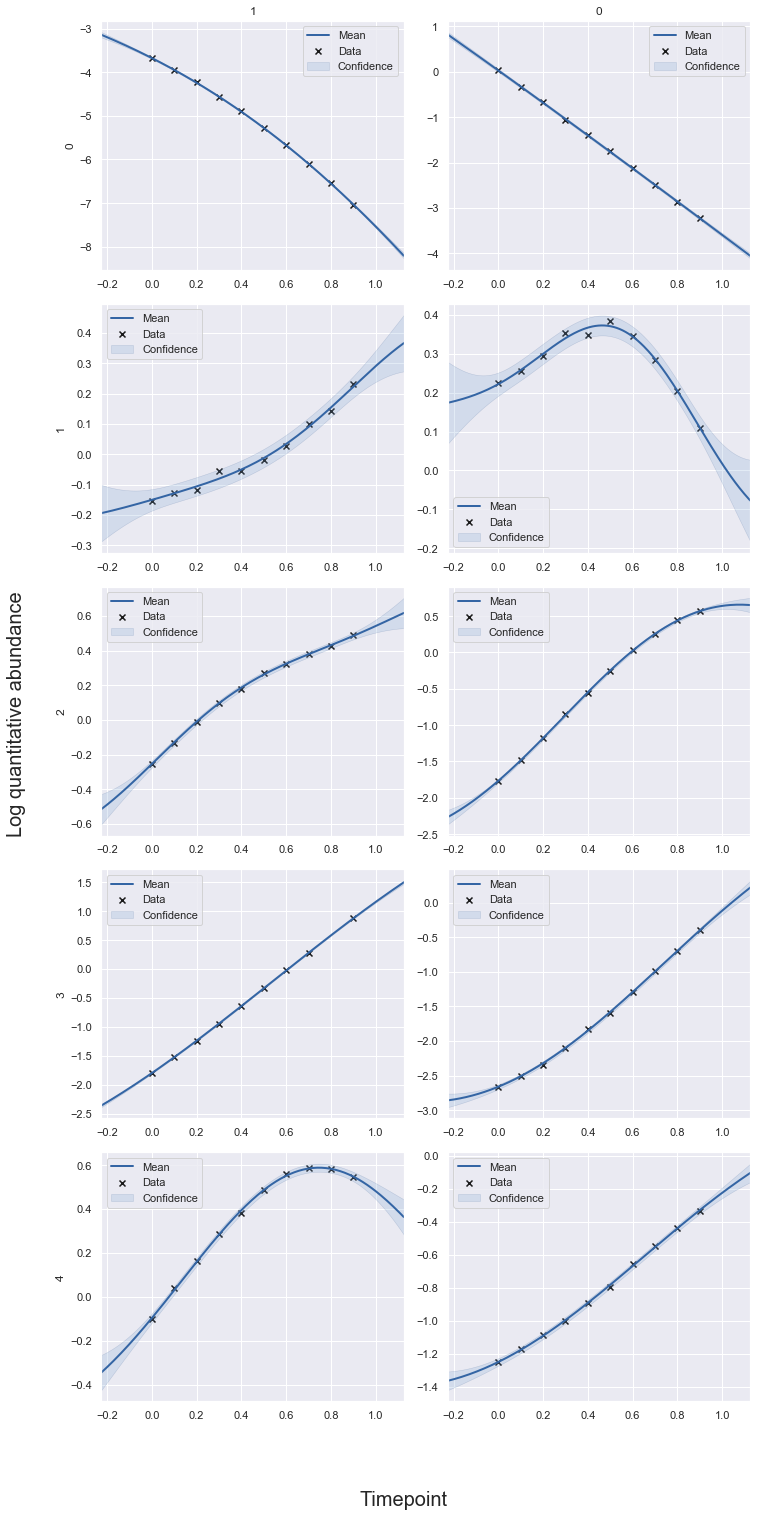

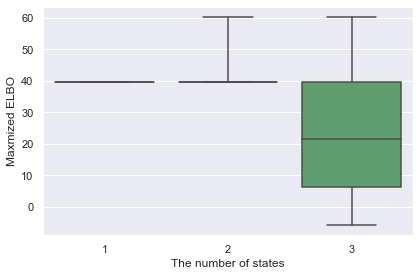

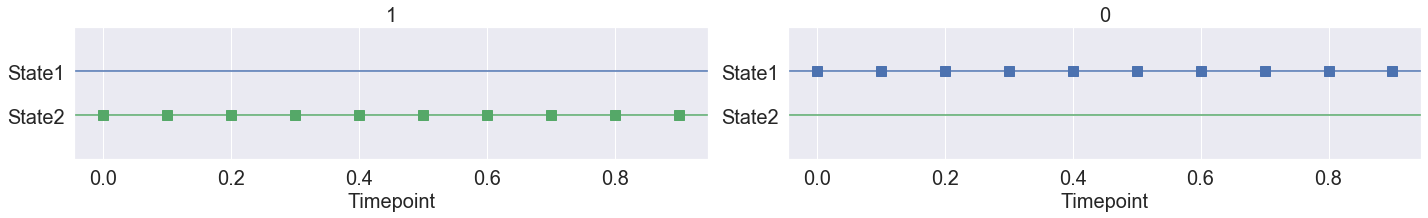

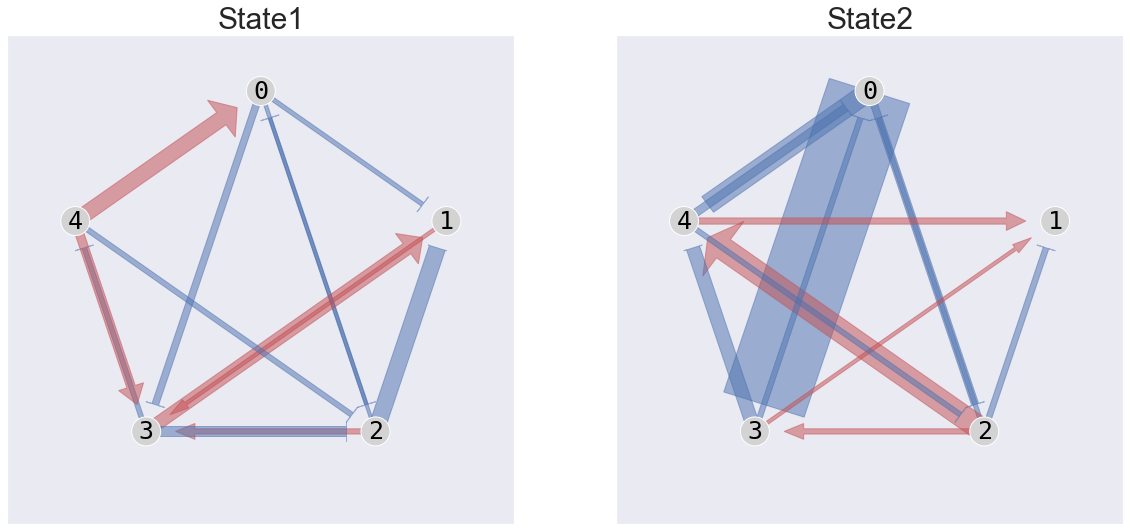

In [10]:
obj.plot()

These figures are saved in the directory path determined by the output_path option, that is, ../output in this case.